<a href="https://colab.research.google.com/github/rickyC3/boston_housing_prediction/blob/main/boston_housing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data() # 載入資料

In [22]:
# 檢查資料型態、形狀
print(type(x_train))
print(x_train.shape)
print(x_train[0])

<class 'numpy.ndarray'>
(404, 13)
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [23]:
model = keras.Sequential()

model.add(Dense(64,  input_shape = (13,), activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse', 'mae'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                896       
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 9,345
Trainable params: 9,345
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
model.fit(x_train, y_train, validation_split = 0.2, epochs = 500, verbose = 0)

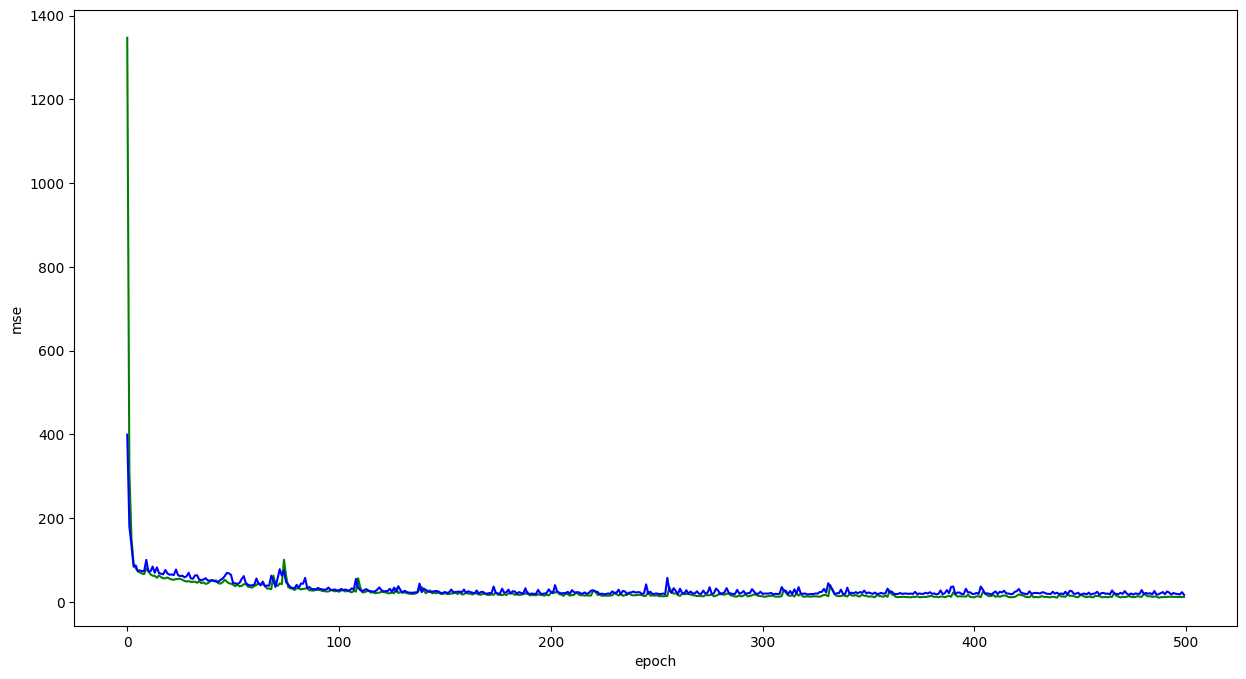

In [25]:
plt.figure(figsize=(15,8))

plt.xlabel('epoch')
plt.ylabel('mse')

plt.plot(model.history.history['loss'][:], 'g')   # 學習的損失函數
plt.plot(model.history.history['val_loss'][:], 'b') # 驗證的損失函數

In [26]:
scores = model.evaluate(x_test, y_test)
scores

4/4 [==============================] - 0s 4ms/step - loss: 29.7204 - mse: 29.7204 - mae: 3.7066


[29.720375061035156, 29.720375061035156, 3.7066078186035156]

4/4 [==============================] - 0s 5ms/step


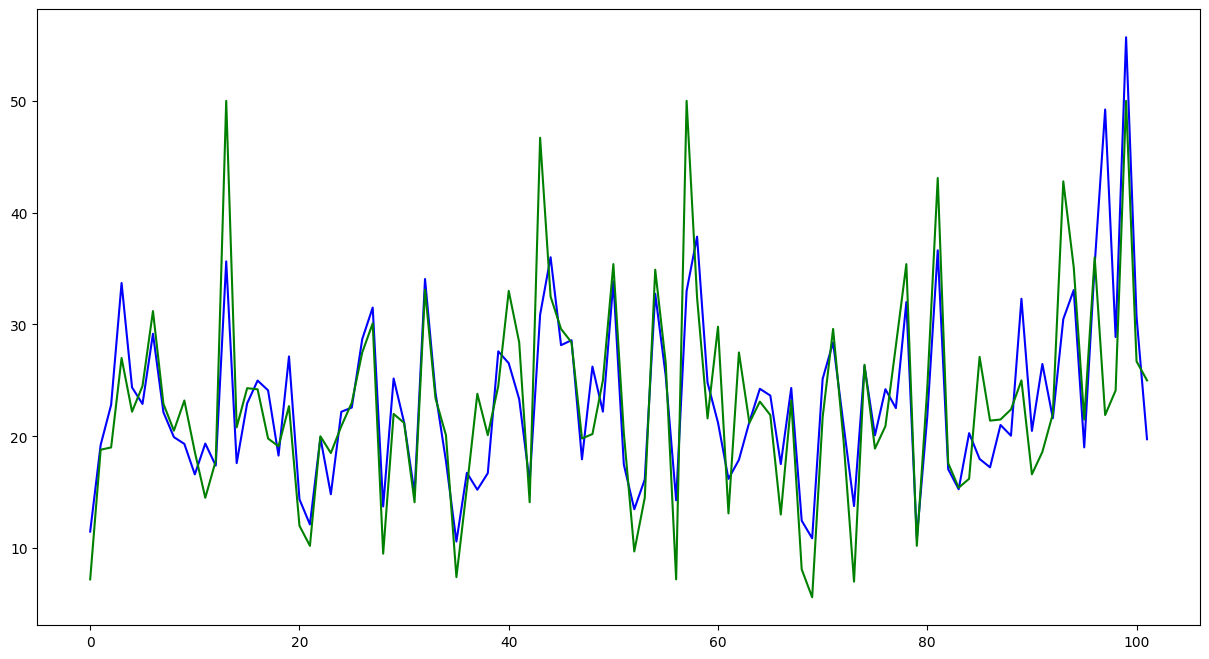

In [27]:
y_pre = model.predict(x_test)
plt.figure(figsize=(15,8))


plt.plot(y_pre, 'b')  # 藍色 預測
plt.plot(y_test, 'g') #  綠色 實際

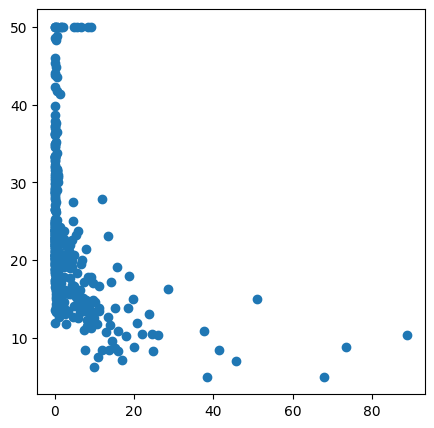

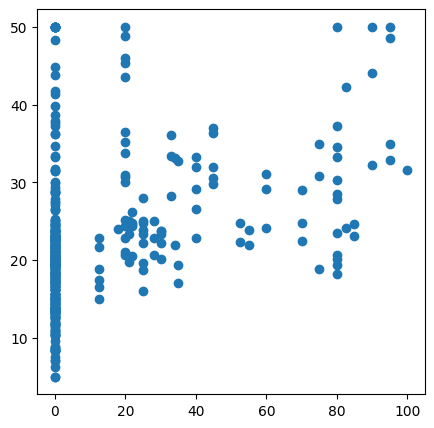

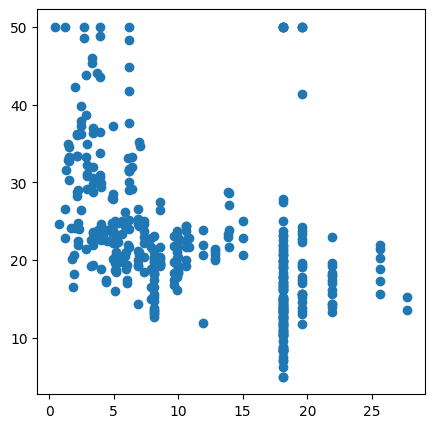

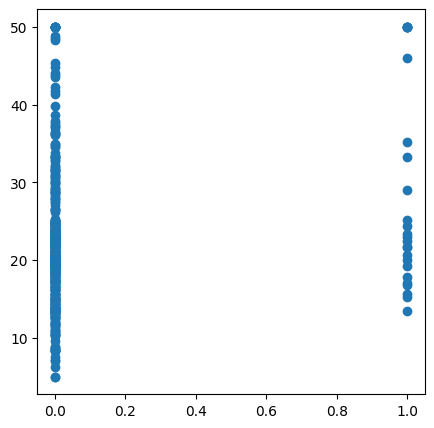

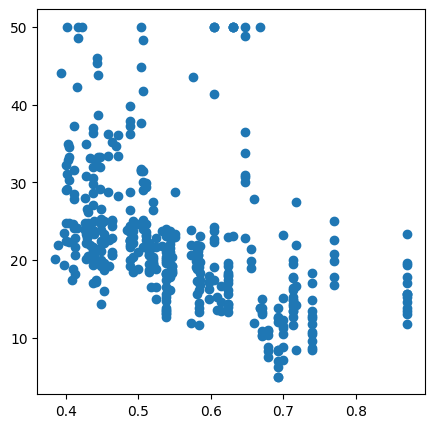

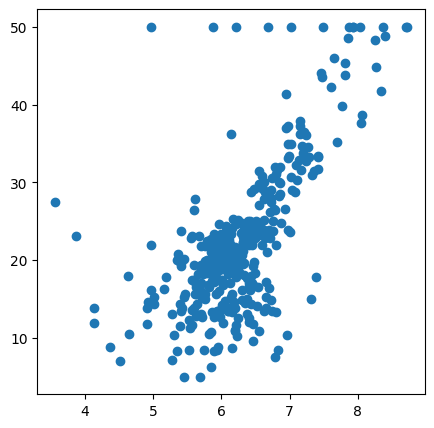

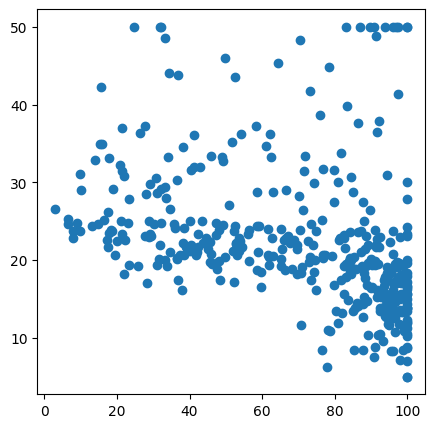

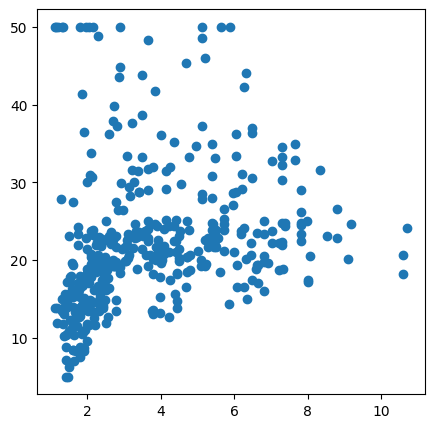

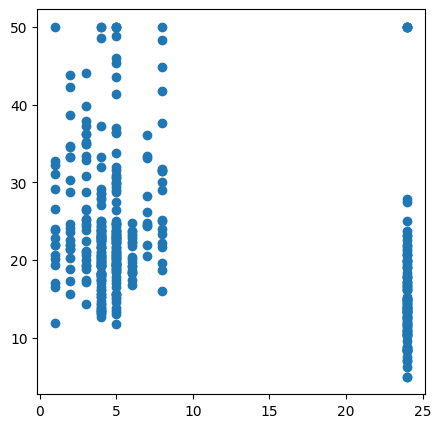

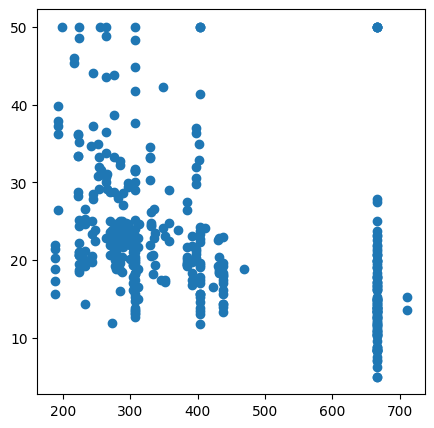

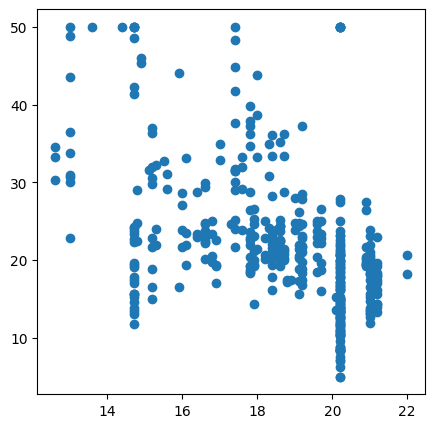

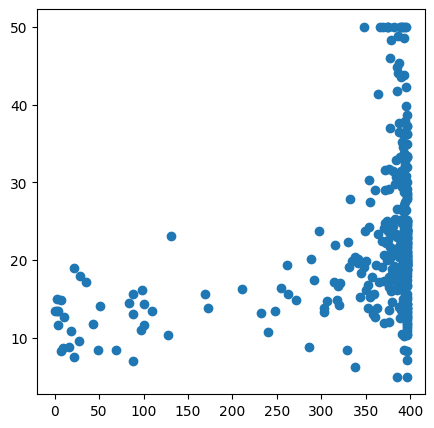

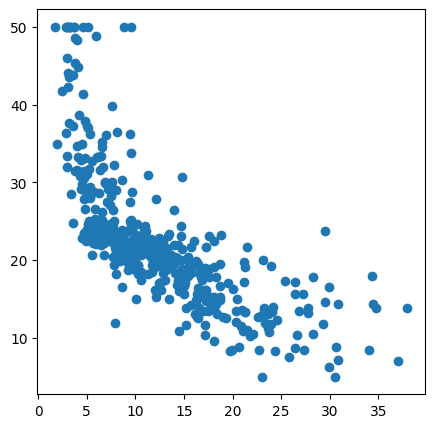

In [28]:
# 資料分析

#plt.figure(figsize = (15, 15))
for i in range(13):
  plt.figure(figsize = (5, 5))
  plt.scatter(x_train[:, i], y_train)
#0, 5, 11 12

In [29]:
x_train2 = np.zeros((404, 2))
x_test2 = np.zeros((102, 2))
y_train2 = np.zeros((404))
y_test2 = np.zeros((102))

In [30]:
for i in range(404):
  x_train2[i, 0] = x_train[i, 5]
  x_train2[i, 1] = x_train[i, 12]
  y_train2[i] = y_train[i]

for i in range(102):
  x_test2[i, 0] = x_test[i, 5]
  x_test2[i, 1] = x_test[i, 12]
  y_test2[i] = y_test[i]

In [70]:
model2 = keras.Sequential()

model2.add(Dense(20,  input_shape = (2,), activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(128, activation = 'relu'))

model2.add(Dense(1, activation = 'linear'))

model2.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae', 'mse'])

In [64]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 20)                60        
                                                                 
 dense_39 (Dense)            (None, 64)                1344      
                                                                 
 dense_40 (Dense)            (None, 128)               8320      
                                                                 
 dense_41 (Dense)            (None, 256)               33024     
                                                                 
 dense_42 (Dense)            (None, 1)                 257       
                                                                 
Total params: 43,005
Trainable params: 43,005
Non-trainable params: 0
_________________________________________________________________


In [71]:
model2.fit(x_train2, y_train2, validation_split = 0.2, epochs = 500, verbose = 0)

In [34]:
print((model2.history.history.keys()))

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


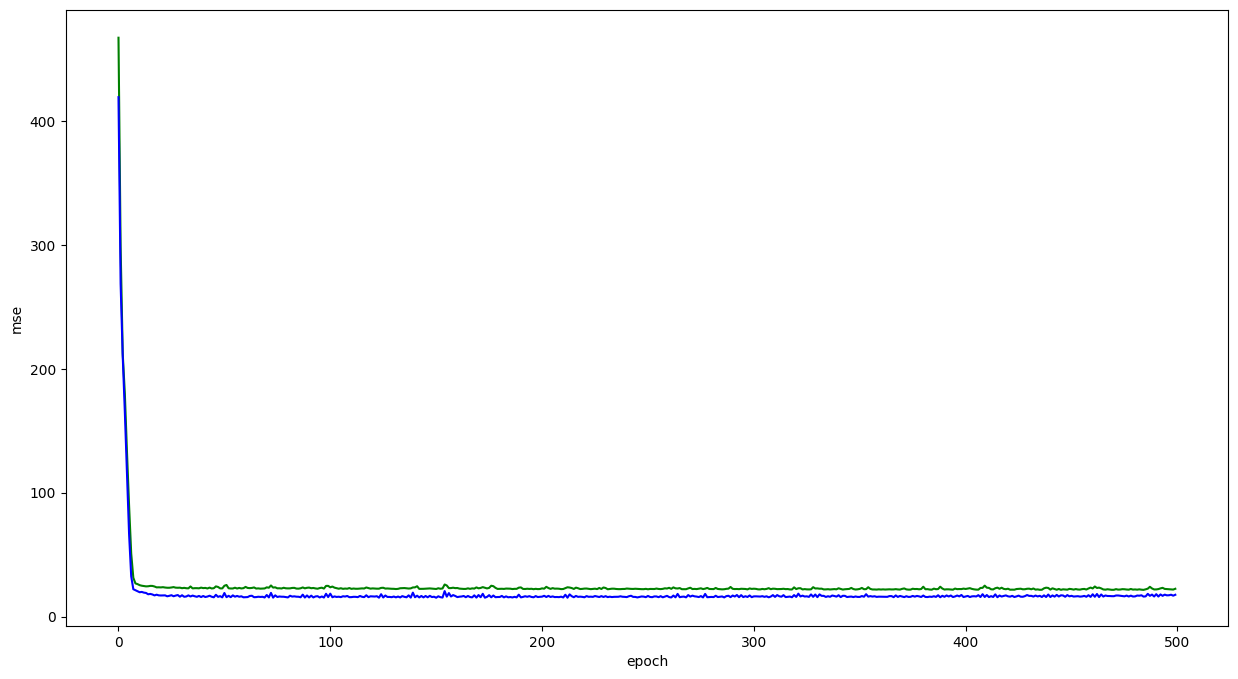

In [72]:
plt.figure(figsize=(15,8))

plt.xlabel('epoch')
plt.ylabel('mse')

plt.plot(model2.history.history['loss'][:], 'g')   # 學習的損失函數
plt.plot(model2.history.history['val_loss'][:], 'b') # 驗證的損失函數


In [73]:
scores = model2.evaluate(x_test2, y_test2)

4/4 [==============================] - 0s 4ms/step - loss: 25.6221 - mae: 3.6726 - mse: 25.6221


In [37]:
y_pre = model2.predict(x_test2)

4/4 [==============================] - 0s 4ms/step


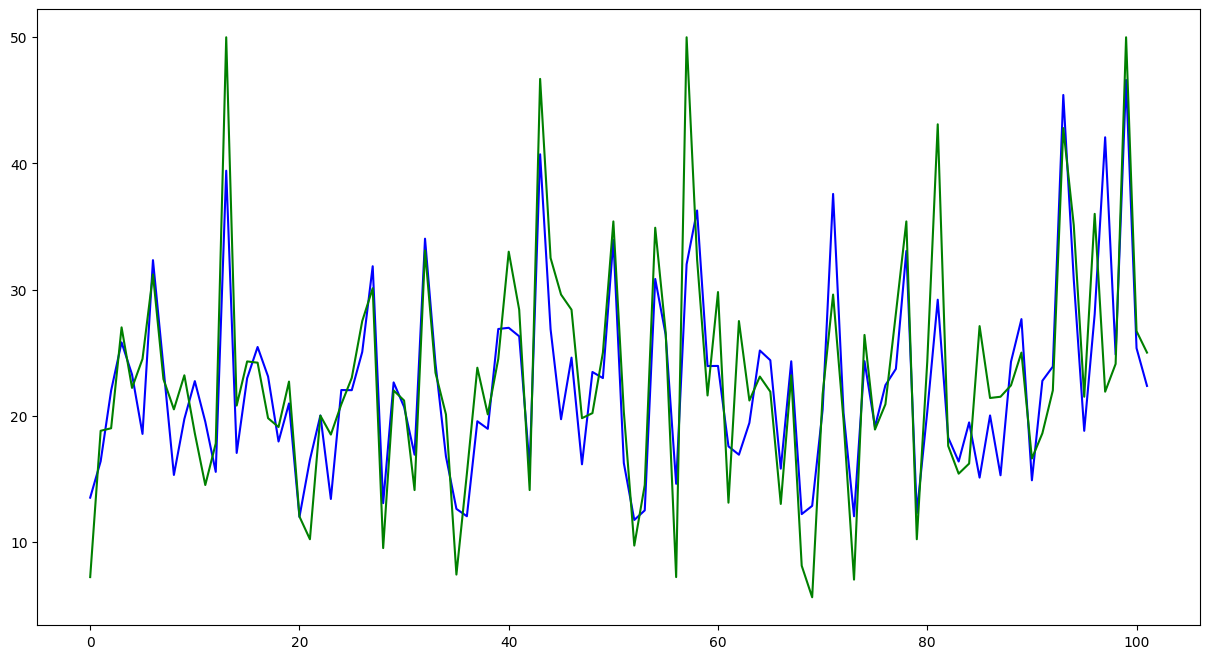

In [38]:
plt.figure(figsize=(15,8))


plt.plot(y_pre, 'b')  # 藍色 預測
plt.plot(y_test, 'g') #  綠色 實際